<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Bridge_Cracks/Bridge_Cracks_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# ==============================================
# Enhanced Lightweight CNN for Bridge Cracks
# with num_images selection
# ==============================================

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ----------------------------
# 2. Imports
# ----------------------------
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import cv2
import random
from sklearn.model_selection import train_test_split

# ----------------------------
# 3. Dataset Path & Parameters
# ----------------------------
dataset_dir = '/content/drive/MyDrive/Bridge_Cracks'  # contains Positive & Negative subfolders

num_images = 2000  # <-- user can change this value

test_split = 0.2
batch_size = 64
seed = 23

# ----------------------------
# 4. Load All Images into Memory
# ----------------------------
data = []
labels = []

class_names = sorted(os.listdir(dataset_dir))
print("Classes:", class_names)

for idx, cls in enumerate(class_names):
    cls_folder = os.path.join(dataset_dir, cls)
    for fname in os.listdir(cls_folder):
        fpath = os.path.join(cls_folder, fname)
        img = cv2.imread(fpath)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(idx)

# Shuffle & Limit number of images
combined = list(zip(data, labels))
random.seed(seed)
random.shuffle(combined)
data, labels = zip(*combined)
data = list(data)[:num_images]
labels = list(labels)[:num_images]

# Detect image size from first sample
img_height, img_width = data[0].shape[:2]
print(f"Detected image size: {img_height}x{img_width}")
data = np.array([cv2.resize(img, (img_width, img_height)) for img in data]) / 255.0
labels = np.array(labels)

# ----------------------------
# 5. Train-Test Split
# ----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=test_split, random_state=seed, stratify=labels)

print("Train size:", len(X_train), "Validation size:", len(X_val))

# ----------------------------
# 6. Build Enhanced Lightweight CNN
# ----------------------------
model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ----------------------------
# 7. Train Model
# ----------------------------
history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 50,
    batch_size = batch_size,
    verbose = 1
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes: ['Negative', 'Positive']
Detected image size: 200x200
Train size: 1600 Validation size: 400


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 200, 200, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,914 (433.26 KB)

 Trainable params: 110,466 (431.51 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.6968 - loss: 0.7763 - val_accuracy: 0.7300 - val_loss: 0.6221
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7717 - loss: 0.5275 - val_accuracy: 0.7300 - val_loss: 0.5835
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.8001 - loss: 0.4525 - val_accuracy: 0.7300 - val_loss: 0.6435
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8139 - loss: 0.4110 - val_accuracy: 0.7300 - val_loss: 0.7992
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8455 - loss: 0.3707 - val_accuracy: 0.7300 - val_loss: 1.2055
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.8533 - loss: 0.3367 - val_accuracy: 0.7300 - val_loss: 1.4421
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8734 - loss: 0.3349 - val_accuracy: 0.7300 - val_loss: 1.5534
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8617 - loss: 0.3195 - val_accuracy: 0

In [47]:
y_prob_train = model.predict(X_train)[:,1]
y_prob_val = model.predict(X_val)[:,1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


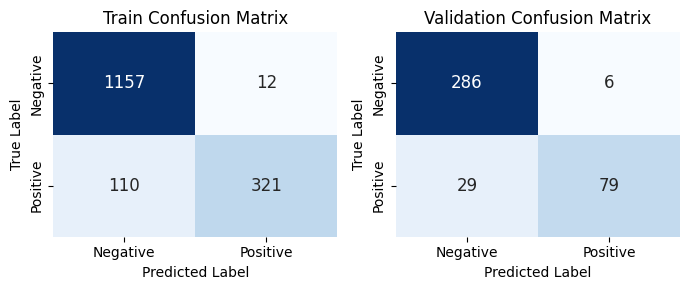

In [48]:
# ----------------------------
# 9. Confusion Matrices (Train + Val) in 1x2 subplot
# ----------------------------
def plot_confusion_matrices(y_train, y_prob_train, y_val, y_prob_val, class_names):
    fig, axes = plt.subplots(1, 2, figsize=(7, 3))

    # Train confusion matrix
    y_pred_train = (y_prob_train >= 0.5).astype(int)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_train_df = pd.DataFrame(cm_train, index=class_names, columns=class_names)
    sns.heatmap(cm_train_df, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size":12}, ax=axes[0])
    axes[0].set_title("Train Confusion Matrix", fontsize=12)
    axes[0].set_ylabel("True Label", fontsize=10)
    axes[0].set_xlabel("Predicted Label", fontsize=10)

    # Validation confusion matrix
    y_pred_val = (y_prob_val >= 0.5).astype(int)
    cm_val = confusion_matrix(y_val, y_pred_val)
    cm_val_df = pd.DataFrame(cm_val, index=class_names, columns=class_names)
    sns.heatmap(cm_val_df, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size":12}, ax=axes[1])
    axes[1].set_title("Validation Confusion Matrix", fontsize=12)
    axes[1].set_ylabel("True Label", fontsize=10)
    axes[1].set_xlabel("Predicted Label", fontsize=10)

    plt.tight_layout()
    plt.savefig("confusion_matrices.png")
    plt.show()

# Call function
plot_confusion_matrices(y_train, y_prob_train, y_val, y_prob_val, class_names)


In [49]:
# ----------------------------
# 10. Classification Report (Train + Validation) - Fixed
# ----------------------------
from sklearn.metrics import classification_report

# Predictions
y_pred_train = (y_prob_train >= 0.5).astype(int)
y_pred_val   = (y_prob_val >= 0.5).astype(int)

# Reports
report_train = classification_report(y_train, y_pred_train, target_names=class_names, output_dict=True, zero_division=0)
report_val   = classification_report(y_val, y_pred_val, target_names=class_names, output_dict=True, zero_division=0)

# Convert to DataFrames
df_train = pd.DataFrame(report_train).transpose()
df_val   = pd.DataFrame(report_val).transpose()

# Add dataset labels
df_train["Dataset"] = "Train"
df_val["Dataset"]   = "Validation"

# Combine
df_report = pd.concat([df_train, df_val])

# # Save full report
# df_report.to_csv("classification_report_train_val.csv", index=True)

# Extract only overall metrics (precision, recall, f1-score, accuracy)
summary = pd.DataFrame({
    "Dataset": ["Train", "Validation"],
    "Accuracy": [df_train.loc["accuracy", "precision"], df_val.loc["accuracy", "precision"]],
    "Precision": [df_train.loc["weighted avg", "precision"], df_val.loc["weighted avg", "precision"]],
    "Recall": [df_train.loc["weighted avg", "recall"], df_val.loc["weighted avg", "recall"]],
    "F1-Score": [df_train.loc["weighted avg", "f1-score"], df_val.loc["weighted avg", "f1-score"]]
})

summary


,Dataset,Accuracy,Precision,Recall,F1-Score
0,Train,0.92375,0.926860,0.92375,0.920393
1,Validation,0.91250,0.913735,0.91250,0.908944


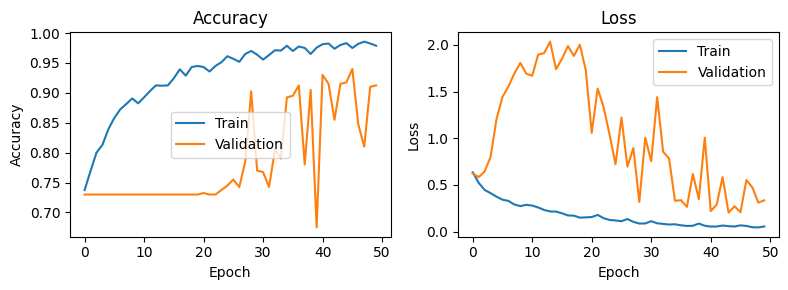

In [50]:
# ----------------------------
# 11. Accuracy and Loss Plots
# ----------------------------
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('accuracy_loss.png')
plt.show()


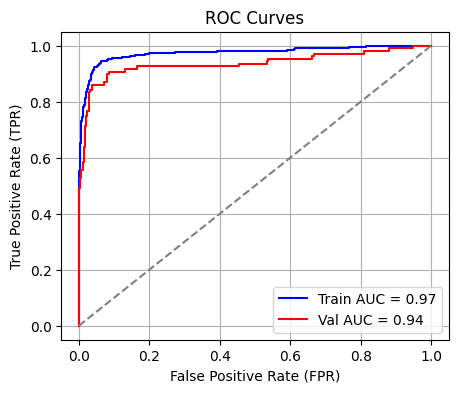

In [51]:
# ----------------------------
# 8. ROC Curves
# ----------------------------
plt.figure(figsize=(5,4))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot(fpr_val, tpr_val, color='red', label=f'Val AUC = {roc_auc_val:.2f}')
plt.plot([0,1], [0,1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves')
plt.legend(loc="lower right")   # legend at bottom right
plt.grid()

plt.savefig('roc_curves.png')
plt.show()


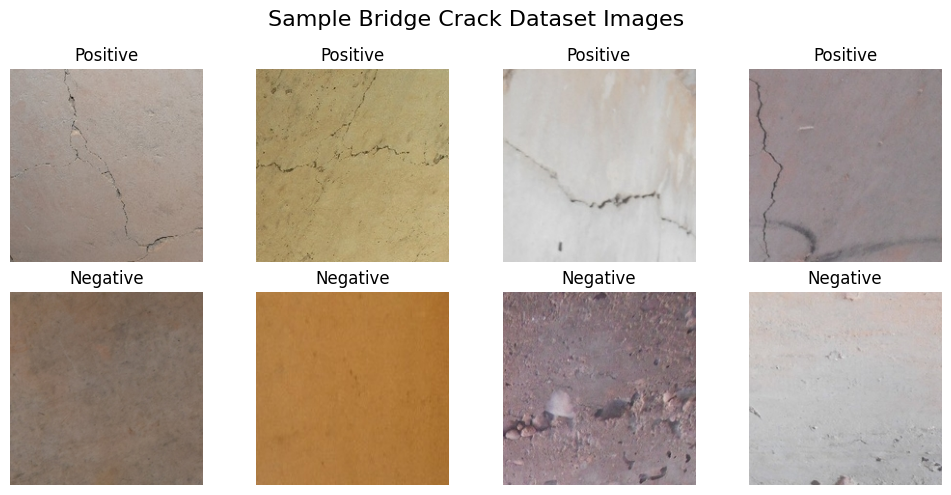

In [52]:
import matplotlib.pyplot as plt
import os
import cv2
import random

# Paths for Positive and Negative subfolders
positive_dir = os.path.join(dataset_dir, "Positive")
negative_dir = os.path.join(dataset_dir, "Negative")

# Pick 4 random samples from each class
positive_samples = random.sample(os.listdir(positive_dir), 4)
negative_samples = random.sample(os.listdir(negative_dir), 4)

# Plot figure
fig, axes = plt.subplots(2, 4, figsize=(10,5))

# First row: Positive cracks
for i, img_name in enumerate(positive_samples):
    img_path = os.path.join(positive_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[0, i].imshow(img)
    axes[0, i].set_title("Positive")
    axes[0, i].axis("off")

# Second row: Negative (no cracks)
for i, img_name in enumerate(negative_samples):
    img_path = os.path.join(negative_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[1, i].imshow(img)
    axes[1, i].set_title("Negative")
    axes[1, i].axis("off")

plt.suptitle("Sample Bridge Crack Dataset Images", fontsize=16)
plt.tight_layout()
plt.savefig("sample_bridge_crack_images.png")
plt.show()
